## DIGITAL IMAGE PROCESSING - LAB 4

In [29]:
#import libraries
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage import filters, morphology

#### Jupyter

In [30]:
path_im = r"C:\Users\lara2\OneDrive\Documentos\UFES\PDI\Labs\Lab04\\"

#### Colab:

In [ ]:
path_im = '/content/'

## Question 1: Apply morphological processing to remove noise from the image from Fig9.11(a).jpg. Use the opening and closing operations. Analyze the result.


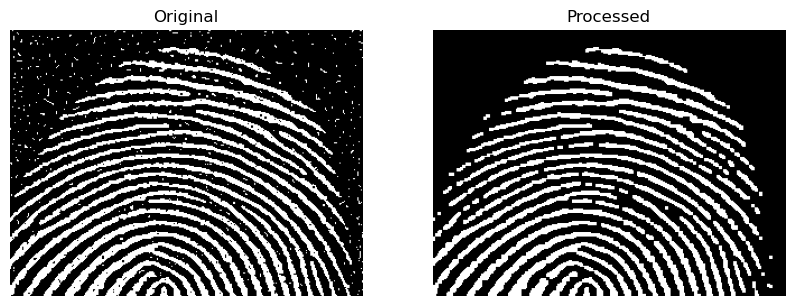

In [46]:
im = skimage.io.imread(path_im+'Fig9.11(a).jpg')

res1 = 3
selem = morphology.rectangle(res1,res1) #structuring element
im_f = morphology.binary_opening(im, footprint=selem) #binary opening
im_f = morphology.binary_closing(im_f, footprint=selem) #binary closing

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im,cmap='gray')
axs[1].imshow(im_f,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Processed');
axs[0].axis('off')
axs[1].axis('off');

## Question 2: Propose a solution by morphological processing to fill the rectangle of figure FigProb9.18.jpg and remove the surrounding noise. Note the difference between the processed image and the original and interpret what is being shown. What could you do if you only wanted the small elements outside the rectangle?

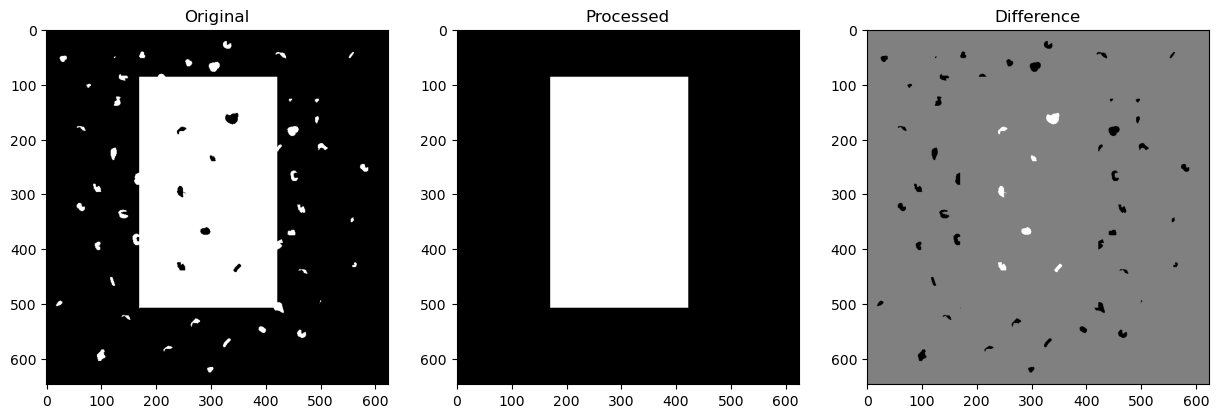

In [47]:
im2 = skimage.io.imread(path_im+'FigProb9.18.jpg') #original image is binary: [0,255]

res2 = 23
selem = morphology.rectangle(res2,res2)
im2_f = morphology.binary_opening(im2, footprint=selem)
im2_f = morphology.binary_closing(im2_f, footprint=selem) #processed image is binary: [0,1]

im2_dif = 255*im2_f - im2
if im2_dif[:,:] == 255:
    im2_dif[:,:] = 0

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im2_f,cmap='gray')
axs[2].imshow(255*im2_f - im2,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Processed');
axs[2].set_title('Difference');
#axs[0].axis('off')
#axs[1].axis('off')
#axs[2].axis('off');

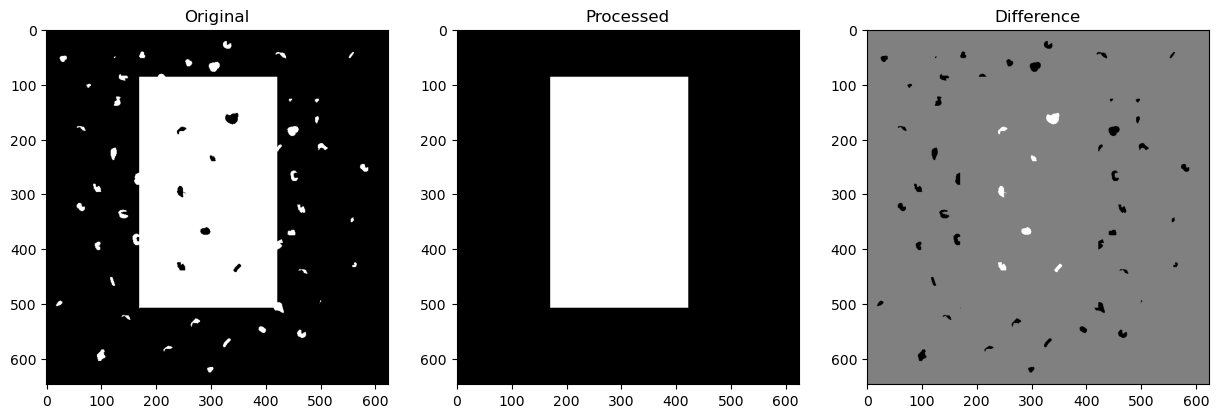

In [49]:
im2_dif = 255*im2_f - im2

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im2_f,cmap='gray')
axs[2].imshow(255*im2_f - im2,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Processed');
axs[2].set_title('Difference');
#axs[0].axis('off')
#axs[1].axis('off')
#axs[2].axis('off');

## Question 3: Apply a morphological processing in figure Fig10.04(a).jpg in order to keep only the vertical connections. Repeat the process, but this time leaving only the horizontal connections. Which structuring element should you pass in each case?

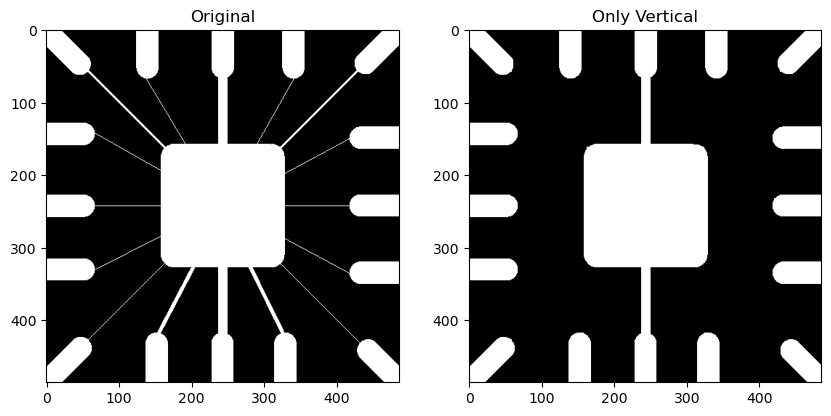

In [60]:
im3 = skimage.io.imread(path_im+'Fig10.04(a).jpg')

res3 = 7
selem = morphology.rectangle(res3, res3)
im3_f_vert = morphology.binary_erosion(im3, footprint=selem) #processed image is binary: [0,1]
im3_f_vert = morphology.binary_dilation(im3_f_vert, footprint=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im3,cmap='gray')
axs[1].imshow(im3_f_vert,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Only Vertical');
#axs[0].axis('off')
#axs[1].axis('off');

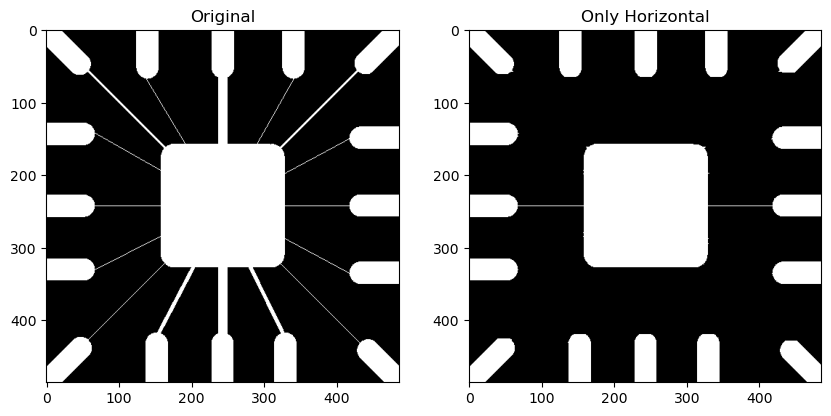

In [62]:
res3_1 = 1
res3_2 = 15

selem = morphology.rectangle(res3_1,res3_2)
im3_f_hor = morphology.binary_erosion(im3, footprint=selem) #processed image is binary: [0,1]
im3_f_hor = morphology.binary_dilation(im3_f_hor, footprint=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im3,cmap='gray')
axs[1].imshow(im3_f_hor,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Only Horizontal');
#axs[0].axis('off')
#axs[1].axis('off');

## Question 4: Apply morphological processing to remove small white dots from figure FigProb4.16(original).jpg.

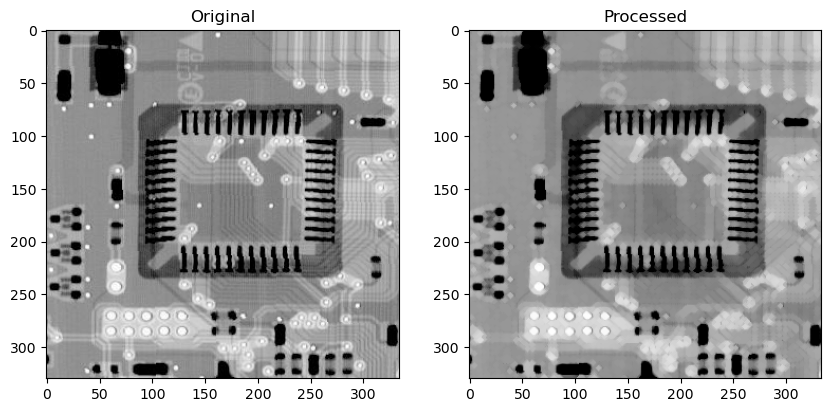

In [66]:
im4 = skimage.io.imread(path_im+'FigProb4.16(original).jpg')


selem = morphology.disk(2)
im4_f = morphology.gray.opening(im4, footprint=selem)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im4,cmap='gray')
axs[1].imshow(im4_f,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Processed');

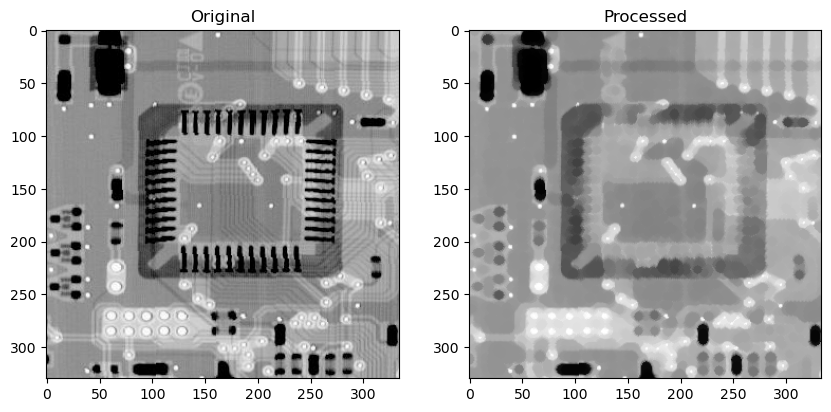

In [108]:
selem = morphology.disk(4)
#im4_f2 = morphology.closing(im4, footprint=selem)

im4_f2 = morphology.dilation(im4, footprint=selem)
im4_f2 = morphology.erosion(im4_f2, footprint=selem)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im4,cmap='gray')
axs[1].imshow(im4_f2,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Processed');

## Question 5: Obtain the convex hull of Fig11.10.jpg. Use the morphology.convex_hull_image() command.

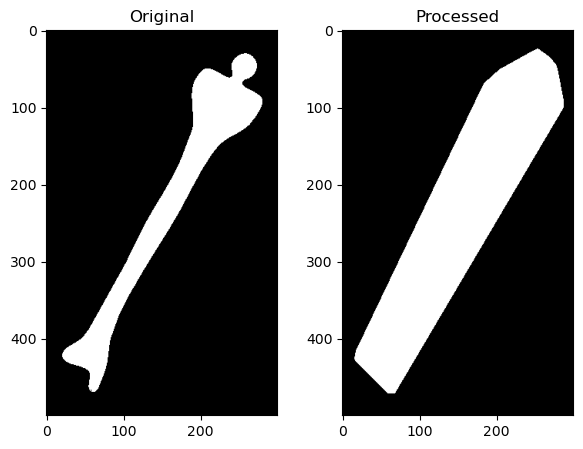

In [67]:
im5 = skimage.io.imread(path_im+'Fig11.10.jpg')

im5_f = morphology.convex_hull_image(im5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
i = 0
ax[i].imshow(im5,cmap='gray')
ax[i].set_title('Original')
i = i+1
ax[i].imshow(im5_f,cmap='gray')
ax[i].set_title('Processed');

## Question 6: Obtain the morphological gradient of the image Fig1.07(c).jpg. Remember that the morphological gradient of a gray level image is the difference between its dilated version and its eroded version.

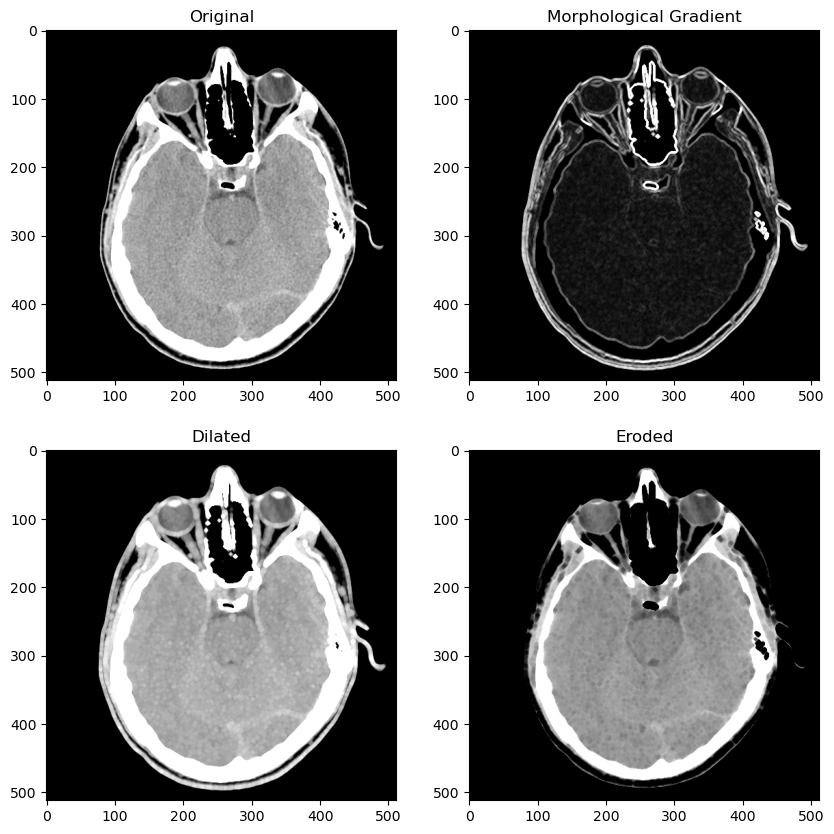

In [79]:
im6 = skimage.io.imread(path_im+'Fig1.07(c).jpg')

footprint = morphology.disk(2)
im6_eroded = morphology.erosion(im6, footprint)
im6_dilated = morphology.dilation(im6, footprint)

im6_morph_grad = im6_dilated - im6_eroded

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
i = 0
j = 0
ax[i, j].imshow(im6,cmap='gray')
ax[i, j].set_title('Original')
j = j+1
ax[i, j].imshow(im6_morph_grad,cmap='gray')
ax[i, j].set_title('Morphological Gradient')
i = i+1
j = 0
ax[i, j].imshow(im6_dilated,cmap='gray')
ax[i, j].set_title('Dilated')
j = j+1
ax[i, j].imshow(im6_eroded,cmap='gray')
ax[i, j].set_title('Eroded');

## Question 7: Perform morphological smoothing on the image Fig1.07(e).jpg in order to eliminate the "noise" around the larger element. Remember to use an opening and closing sequence for grayscale images.

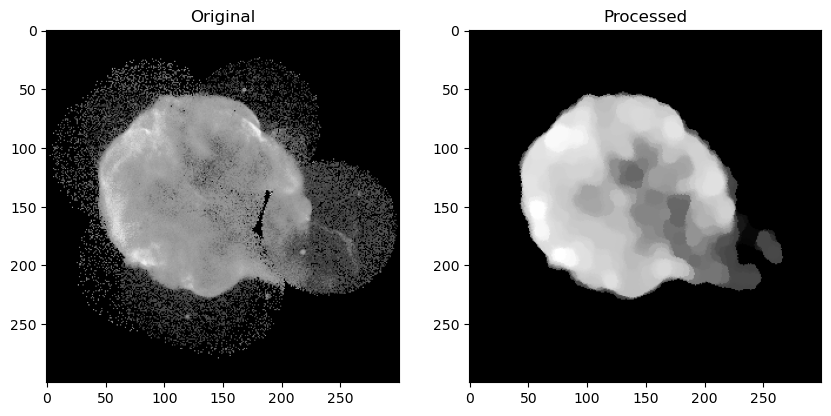

In [98]:
im7 = skimage.io.imread(path_im+'Fig1.07(e).jpg')

selem = morphology.disk(5)
im7_f = morphology.opening(im7, footprint=selem) #processed image is binary: [0,1]
im7_f = morphology.closing(im7_f, footprint=selem)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
i = 0
ax[i].imshow(im7,cmap='gray')
ax[i].set_title('Original')
i = i+1
ax[i].imshow(im7_f,cmap='gray')
ax[i].set_title('Processed');